Mengidentifkasi pola bentuk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


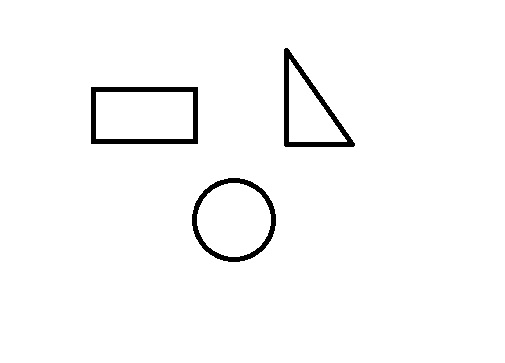

In [ ]:
import numpy as np #include numeric python
import cv2 #include opencv 2
import pandas as pd #include library pengolahan analisis data
import plotly #include library plotly
import plotly.express as px #include plotlty express untuk pixel
import plotly.graph_objects as go #include plotly grapich objek
from skimage import data, filters, measure, morphology #include library measure, morphology untuk pengolahan regionprops
from skimage.measure import label, regionprops, regionprops_table #import library rinci label dll
from google.colab.patches import cv2_imshow # pembuatan function cv2_imshow

image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Gambar1.jpg")
cv2_imshow(image) #gambar original

In [ ]:
grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #mengubah gambar dari RGB ke Greyscale

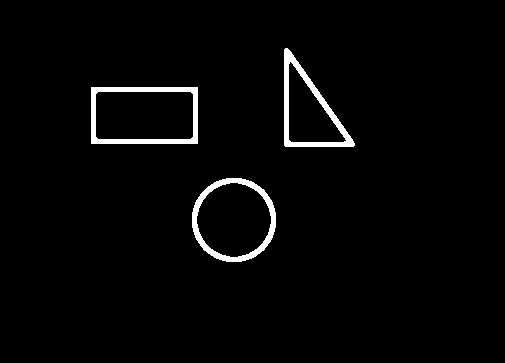

[INFO] otsu's thresholding value: 157.0


In [ ]:
# Metode thresholding Otsu Adaptive
grayscale = cv2.GaussianBlur(grayscale, (7, 7), 0) #menghilangkan noise dengan blur
ret, thresh = cv2.threshold(grayscale,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) #mengambil ambang batas dan membalik warna
cv2_imshow(thresh) #gambar adaptive / kebalikan
print("[INFO] otsu's thresholding value: {}".format(ret))

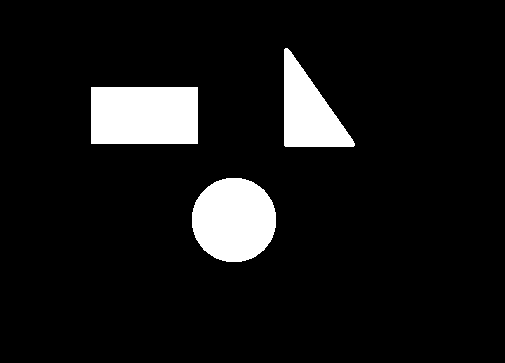

In [ ]:
im_floodfill = thresh.copy() #mengopy data thresh ke variabel floodfill
h, w = thresh.shape #thresh dengan pola bentuk dengan nilai hight dan width
mask = np.zeros((h+2, w+2), np.uint8) #mask nilai high dan width 
cv2.floodFill(im_floodfill, mask, (0,0), 255) #hasil mask difill dengan warna sesuai threshold
im_floodfill_inv = cv2.bitwise_not(im_floodfill) #mengecek apa ada lubang di pola bentuk
im_out = thresh | im_floodfill_inv #banding nilai
cv2_imshow(im_out)

In [ ]:
labels = measure.label(im_out) #fungsi measure label menandai pola bentuk yang terdeteksi
fig = px.imshow(image) #figure dengan pixel
fig.update_traces(hoverinfo='skip') # hover hanya untuk label info

props = measure.regionprops(labels, im_out) #memanggil fungsi regionprops dengan label dan data dari threshold
properties = ['area', 'eccentricity', 'perimeter']



# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(0, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    i = 'gambar';
    hoverinfo = ''
    hoverinfo += f'<b>{i} {label_i}</br></br></b>'
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.01f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)

Output hidden; open in https://colab.research.google.com to view.